# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create empty list to store data
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudniess_list = []
wind_speed_list = []
country_list = []
date_list = []

#Setting constant values
units = 'imperial'
base_url = 'https://api.openweathermap.org/data/2.5/weather?'
count = -1

for city in cities:
    count += 1
    target_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(target_url).json()
    
    try:  
        city_list.append(response['name'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response['main']['humidity'])
        cloudniess_list.append(response['clouds']['all'])
        wind_speed_list.append(response['wind']['speed'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])        
        
    except:
        print('City Not Found')
        
    time.sleep(1)
    
    print(f"Processing Record {count} | {city}")

Processing Record 0 | hithadhoo
Processing Record 1 | qaanaaq
Processing Record 2 | hermanus
Processing Record 3 | kodiak
Processing Record 4 | hobart
Processing Record 5 | yulara
Processing Record 6 | ostrovnoy
Processing Record 7 | port alfred
Processing Record 8 | langsa
Processing Record 9 | mataura
Processing Record 10 | bluff
Processing Record 11 | nome
Processing Record 12 | sain alto
Processing Record 13 | nanortalik
City Not Found
Processing Record 14 | mys shmidta
Processing Record 15 | port keats
City Not Found
Processing Record 16 | samusu
Processing Record 17 | atuona
Processing Record 18 | isangel
Processing Record 19 | gimli
Processing Record 20 | severo-kurilsk
Processing Record 21 | maxixe
Processing Record 22 | beringovskiy
Processing Record 23 | brae
Processing Record 24 | sioux lookout
Processing Record 25 | katobu
Processing Record 26 | punta arenas
Processing Record 27 | vaini
Processing Record 28 | port hedland
Processing Record 29 | provideniya
Processing Record

Processing Record 240 | rampura
Processing Record 241 | aasiaat
Processing Record 242 | shingu
Processing Record 243 | coquimbo
Processing Record 244 | zeya
Processing Record 245 | novopokrovka
City Not Found
Processing Record 246 | marcona
Processing Record 247 | estanzuela
Processing Record 248 | sitka
Processing Record 249 | san cristobal
Processing Record 250 | lingao
Processing Record 251 | victoria
Processing Record 252 | ambon
Processing Record 253 | bucak
Processing Record 254 | pisco
Processing Record 255 | cidreira
Processing Record 256 | meulaboh
Processing Record 257 | ayr
Processing Record 258 | saskylakh
City Not Found
Processing Record 259 | ust-kamchatsk
Processing Record 260 | verkhoyansk
Processing Record 261 | palmerston
Processing Record 262 | mount gambier
Processing Record 263 | inuvik
Processing Record 264 | agirish
Processing Record 265 | zonguldak
Processing Record 266 | vardo
Processing Record 267 | muroto
Processing Record 268 | idanre
Processing Record 269 |

Processing Record 478 | urumqi
Processing Record 479 | ixtapa
Processing Record 480 | kawalu
Processing Record 481 | beloha
Processing Record 482 | romny
Processing Record 483 | meadow lake
Processing Record 484 | lazaro cardenas
Processing Record 485 | bondo
Processing Record 486 | korla
Processing Record 487 | zaysan
Processing Record 488 | shumskiy
Processing Record 489 | palembang
Processing Record 490 | te anau
Processing Record 491 | granada
Processing Record 492 | loncoche
Processing Record 493 | jalu
Processing Record 494 | wundanyi
Processing Record 495 | porto novo
Processing Record 496 | anshun
City Not Found
Processing Record 497 | macaboboni
Processing Record 498 | maridi
Processing Record 499 | chorley
Processing Record 500 | luganville
Processing Record 501 | eyl
Processing Record 502 | nanakuli
Processing Record 503 | concarneau
City Not Found
Processing Record 504 | tubruq
Processing Record 505 | tungor
Processing Record 506 | dingle
Processing Record 507 | mokhsogollo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# creating DataFrame 
city_df = pd.DataFrame(columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', \
                                  'Wind Speed', 'Country', 'Date'])

city_df['City'] = city_list
city_df['Lat'] = lat_list
city_df['Lng'] = lng_list
city_df['Max Temp'] = max_temp_list
city_df['Humidity'] = humidity_list
city_df['Cloudiness'] = cloudniess_list
city_df['Wind Speed'] = wind_speed_list
city_df['Country'] = country_list
city_df['Date'] = date_list

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.54,76,100,19.19,MV,1659152973
1,Qaanaaq,77.4840,-69.3632,36.57,62,0,4.05,GL,1659152975
2,Hermanus,-34.4187,19.2345,44.80,77,99,9.40,ZA,1659152976
3,Saint Paul Harbor,57.7900,-152.4072,54.91,94,100,8.05,US,1659152978
4,Hobart,-42.8794,147.3294,53.22,58,40,12.66,AU,1659152863


In [5]:
#Writing it to CSV file
city_df.to_csv(output_data_file)

In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.300558,24.901759,68.741818,72.484848,59.074866,7.347754,1.659153e+09
std,32.967280,89.924686,13.252398,18.679827,37.904976,5.498592,2.577171e+02
min,-54.800000,-179.166700,32.050000,13.000000,0.000000,0.000000,1.659153e+09
25%,-6.216700,-52.869900,59.430000,61.000000,20.000000,3.440000,1.659153e+09
50%,24.687700,29.833300,70.050000,76.000000,71.000000,5.820000,1.659153e+09
75%,50.200100,105.319600,79.320000,87.000000,99.000000,9.660000,1.659154e+09
max,78.218600,179.316700,101.030000,100.000000,100.000000,30.130000,1.659154e+09


In [4]:
# Reading the cities from saved CSV file to avoid executing the api code again
city_df = pd.read_csv('output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
if city_df['Humidity'].max() > 100:
    city_df = city_df[city_df['Humidity'] <= 100]
    city_df.describe()

In [6]:
#  Get the indices of cities that have humidity over 100%.
city_df.index[city_df['Humidity'] > 100]

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = city_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Calculate lower and upper boundary
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(upper_bound)
print(lower_bound)

126.0
22.0


In [8]:
clean_city_data = city_df.loc[(city_df['Humidity'] > lower_bound) & (city_df['Humidity'] < upper_bound)]

clean_city_data.describe()


,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,281.309222,21.310481,24.010969,68.513779,73.303797,59.224231,7.317269,1.659153e+09
std,161.907337,33.057273,90.149912,13.181631,17.516295,37.834168,5.516560,2.576652e+02
min,0.000000,-54.800000,-179.166700,32.050000,25.000000,0.000000,0.000000,1.659153e+09
25%,142.000000,-6.216700,-53.264800,59.270000,63.000000,20.000000,3.420000,1.659153e+09
50%,281.000000,24.344800,29.692500,69.910000,76.000000,71.000000,5.750000,1.659153e+09
75%,422.000000,50.611400,105.319600,79.210000,87.000000,99.000000,9.640000,1.659154e+09
max,560.000000,78.218600,179.316700,101.030000,100.000000,100.000000,30.130000,1.659154e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

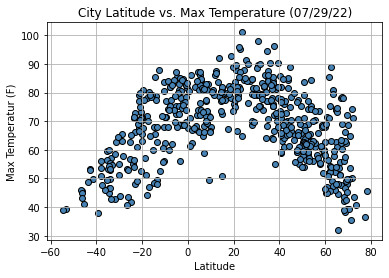

In [11]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-MaxTemperature.png')
plt.show()

## Latitude vs. Humidity Plot

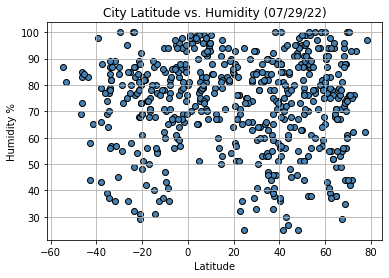

In [12]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Humidity ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

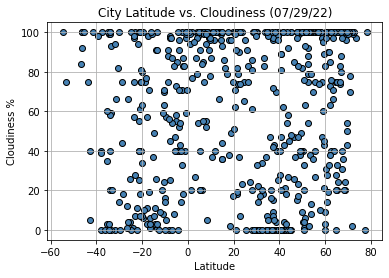

In [13]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Cloudiness ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

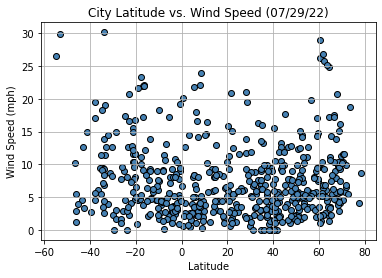

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black', c='steelblue')
plt.title(f"City Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('output_data/CityLatitude-vs-WindSpeed.png')
plt.show()

## Linear Regression

In [10]:
north_Hem_df = clean_city_data[clean_city_data['Lat'] >= 0]
north_Hem_df.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,3.810000e+02
mean,288.774278,39.599687,19.467395,70.057428,73.713911,62.325459,6.947087,1.659153e+09
std,160.203182,20.846162,88.757147,12.923209,17.877052,37.918599,5.270263,2.536152e+02
min,1.000000,0.093900,-179.166700,32.050000,25.000000,0.000000,0.000000,1.659153e+09
25%,153.000000,22.075200,-53.673500,61.920000,63.000000,24.000000,3.110000,1.659153e+09
50%,286.000000,40.810000,28.100400,71.190000,76.000000,75.000000,5.750000,1.659153e+09
75%,431.000000,57.902900,95.216700,80.260000,88.000000,100.000000,9.220000,1.659154e+09
max,560.000000,78.218600,179.316700,101.030000,100.000000,100.000000,28.920000,1.659154e+09


In [11]:
south_Hem_df = clean_city_data[clean_city_data['Lat'] < 0]
south_Hem_df.describe()

,Unnamed: 0,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,264.773256,-19.202235,34.075514,65.094419,72.395349,52.354651,8.137267,1.659153e+09
std,164.887595,12.873623,92.630299,13.141279,16.704364,36.833223,5.960928,2.658275e+02
min,0.000000,-54.800000,-175.200000,37.900000,29.000000,0.000000,0.000000,1.659153e+09
25%,112.750000,-28.770775,-50.529200,53.862500,64.000000,14.000000,3.822500,1.659153e+09
50%,264.500000,-18.649850,31.177200,67.895000,76.500000,56.500000,6.835000,1.659153e+09
75%,411.250000,-8.192225,123.509750,76.525000,85.000000,91.000000,10.947500,1.659154e+09
max,551.000000,-0.316700,173.166700,87.930000,100.000000,100.000000,30.130000,1.659154e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.3519937510436887


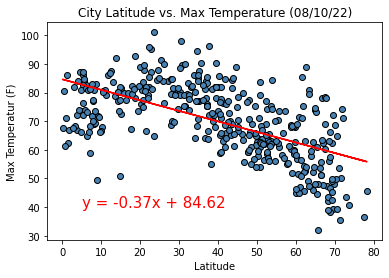

In [12]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Max Temp'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Max Temp'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (5,40), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* The rsquared value is 0.35 which suggest that we dont see a strong correlation between Temperature and Lattitude but we can definitely see a negative slope which makes sense it gets colder as we move away from equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The rsquare-value is: 0.5570698515974677


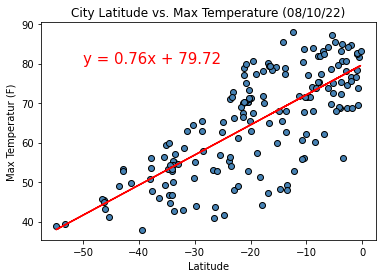

In [13]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Max Temp'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Max Temp'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-50,80), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Max Temperature ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (F)')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* The rsquared value is 0.55 which suggest that we do see a stronger correlation between Temperature and Lattitude plus we can definitely see a positive slope which makes sense it gets colder as we move away from equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.01976698332386072


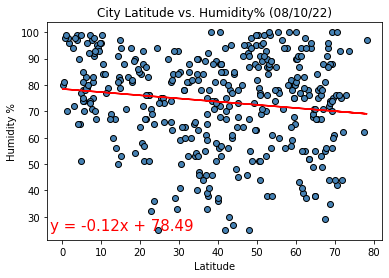

In [19]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Humidity'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Humidity'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-3,25), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Humidity% ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* We dont see any correlation between Humidity and Lattitude. Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Lattitude and Humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The rsquare-value is: 0.002283420143053356


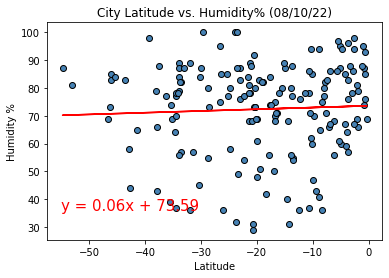

In [20]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Humidity'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Humidity'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,36), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Humidity% ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* We dont see any correlation between Humidity and Lattitude. Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Lattitude and Humidity

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.004324843272261896


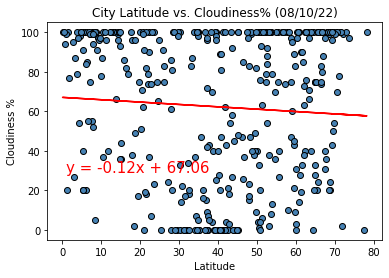

In [21]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Cloudiness'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Cloudiness'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (1,29), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Cloudiness% ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* We dont see any correlation between Cloudiness and Lattitude. Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Cloudiness and Lattitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The rsquare-value is: 0.0006500777951193172


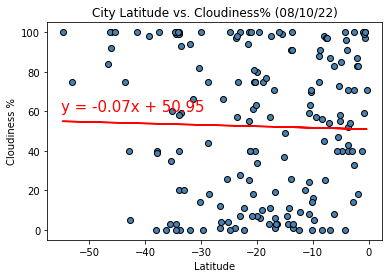

In [22]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Cloudiness'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Cloudiness'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,60), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Cloudiness% ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

* We dont see any correlation between Cloudiness and Lattitude. Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Cloudiness and Lattitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.019780775986786268


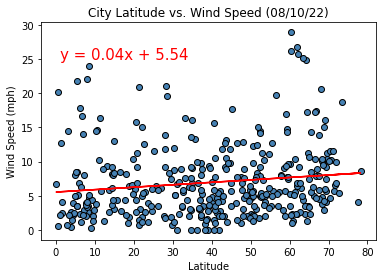

In [23]:
plt.scatter(north_Hem_df['Lat'], north_Hem_df['Wind Speed'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(north_Hem_df['Lat'], north_Hem_df['Wind Speed'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*north_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (1,25), fontsize=15, color='r')
plt.plot(north_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-value is: {rvalue**2}")

plt.show()

* Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Wind Speed and Lattitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The rsquare-value is: 0.06487225320840276


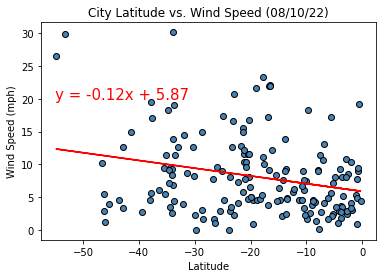

In [24]:
plt.scatter(south_Hem_df['Lat'], south_Hem_df['Wind Speed'], edgecolors='black', c='steelblue')

#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(south_Hem_df['Lat'], south_Hem_df['Wind Speed'])
line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*south_Hem_df['Lat'] + intercept

plt.annotate(line_equ, (-55,20), fontsize=15, color='r')
plt.plot(south_Hem_df['Lat'], regress_value, c='r')
plt.title(f"City Latitude vs. Wind Speed ({date.today().strftime('%m/%d/%y')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The rsquare-value is: {rvalue**2}")


plt.show()

* We dont see any correlation between Wind Speed and Lattitude. Rsqured value is very low and hence our predictor model is good enough to show us the relation between the Wind Speed and Lattitude. 

# Bonus 
* <b>Creating a Function that will create charts based on different parameters</b>

In [57]:
# Sactter Plot Function

def scatterPlot(latitude, yparam, edgecolors='black', c='steelblue', rlinecolor='r'):
    
    '''
    This function returns a scatter plot along with the regression line and it equation.
    It also prints the rsquared value.
    
    latitude is the x-axis parameter (df series) and it a required argument.
    yparam is the y-axis parameter (df series) and its a required argument.
    edgecolors as the name says its the color of the bubble boundary
    c is the color of the bubble for the scatter plot
    rlinecolor is the color for your regression line and its equation. Default is set to red
    
    '''
    
    plt.scatter(latitude, yparam, edgecolors=edgecolors, c=c)

    #Linear Regression
    slope, intercept, rvalue, pvalue, stderr = linregress(latitude, yparam)
    line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

    regress_value = slope*latitude + intercept

    plt.annotate(line_equ, (latitude.min(),yparam.min()), fontsize=15, color=rlinecolor)
    plt.plot(latitude, regress_value, c=rlinecolor)
    plt.xlabel('Latitude')
    
    if yparam.name == 'Wind Speed':
        plt.title(f"City Latitude vs. {yparam.name} (mph) ({date.today().strftime('%m/%d/%y')})")
        plt.ylabel(f'{yparam.name} (mph)')
    elif yparam.name == 'Max Temp':
        plt.title(f"City Latitude vs. {yparam.name}erature (F) ({date.today().strftime('%m/%d/%y')})")
        plt.ylabel(f'{yparam.name}erature (F)')
    else:
        plt.title(f"City Latitude vs. {yparam.name} % ({date.today().strftime('%m/%d/%y')})")
        plt.ylabel(f'{yparam.name} %')
        

    print(f"The rsquare-value is: {rvalue**2}") 
    
    return plt.show()

The rsquare-value is: 0.002283420143053356


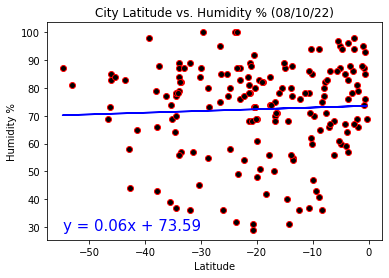

In [60]:
# Test Run

scatterPlot(south_Hem_df['Lat'], south_Hem_df['Humidity'], edgecolors='red', c='black', rlinecolor='blue')



The rsquare-value is: 0.004324843272261896


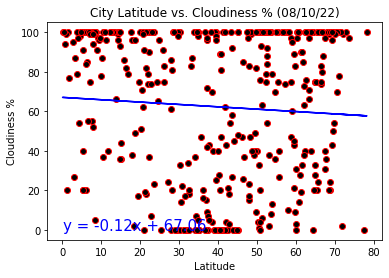

In [61]:
scatterPlot(north_Hem_df['Lat'], north_Hem_df['Cloudiness'], edgecolors='red', c='black', rlinecolor='blue')